# **Práctica 6: Análisis de componentes principales (PCA)**

Nombre: Osvaldo Ibañez Guzman

Número de cuenta: 316058672

Email: osva552920@gmail.com

### **Contexto**

Datos recopilados de la encuesta mundial sobre la salud de estudiantes adolescentes basado en los datos de 26 países, que proporciona un valor de porcentaje por cada uno de los valores. 

**Objetivo:** Hacer un análisis exploratorio de datos sobre las principales razones por las que estudiantes de 13 a 17 años se suicidan.

**Variables**

*	Country – País de procedencia
*	Year – Año que se realizado la encuesta
*	Age Group – Grupo de edades
*	Sex – Genero de personas que realizaron la encuesta
*	Currently_Drink_Alcohol – Bebia Alcohol regularmente
*	Really_Get_Drunk – Realmente se emborrachaba
*	Overwieght - Sobrepeso
*	Use_Marijuana – Consumía Mariguana
*	Have_Understanding_Parents – Tenia padres comprensivos
*	Missed_classes_without_permssion – Faltaba a clases sin permiso
*	Had_sexual_relation – Tenía relaciones sexuales
*	Smoke_cig_currently – Fumaba regularmente
*	Had_fights – Tenia Peleas
*	Bullied – Sufría acoso
*	Got_Seriously_injured – Tenia heridas serias
*	No_close_friends – No tenía amigos cercanos
*	Attempted_suicide – Intentos previos de suicidios

### **Importar las bibliotecas y los datos**

In [8]:
import pandas as pd                         # Para la manipulación y análisis de datos
import numpy as np                          # Para crear vectores y matrices n dimensionales
import matplotlib.pyplot as plt             # Para la generación de gráficas a partir de los datos
import seaborn as sns                       # Para la visualización de datos basado en matplotlib
%matplotlib inline

In [9]:
url = "https://raw.githubusercontent.com/OsvaldoIG/MineriaDatos/main/Data/GHSH_Pooled_Data1.csv"
Suicidio = pd.read_csv(url)
Suicidio 

,Country,Year,Age Group,Sex,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,Argentina,2018,13-15,Female,50.3,30.7,27.8,7.9,41.5,24.7,25.7,16.8,17.2,NaN,27.5,4.8,19.9
1,Argentina,2018,13-15,Male,44.9,26.1,39.1,8.4,44.5,27.9,38.4,12.1,33.2,NaN,37.4,5.5,10.4
2,Argentina,2018,16-17,Female,67.2,56.3,22.5,21.9,37.1,34.0,59.1,28.5,15.1,NaN,30.1,6.3,17.4
3,Argentina,2018,16-17,Male,68.1,55.8,27.9,27.0,39.8,39.4,68.6,28.0,33.6,NaN,40.3,6.6,11.2
4,Argentina,2012,13-15,Male,49.3,28.9,35.9,10.6,46.2,32.0,43.5,17.0,44.2,42.1,24.8,6.1,12.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,Vanuatu,2011,13-15,Female,5.8,4.7,13.6,1.9,20.2,44.6,8.4,8.2,41.8,66.5,57.4,14.3,19.5
102,Wallis and Futuna,2015,13-15,Male,32.2,35.5,60.5,4.0,36.3,32.7,32.0,25.7,48.7,30.2,51.2,4.1,14.7
103,Wallis and Futuna,2015,13-15,Female,24.4,27.1,63.0,2.0,36.3,16.2,13.6,29.9,22.9,30.9,41.7,3.3,16.9
104,Wallis and Futuna,2015,16-17,Male,48.3,53.7,57.8,10.1,36.5,38.9,55.7,40.0,49.6,23.6,54.5,7.3,9.0


## **I. Análisis de componentes principales (ACP)**

1. Hay evidencia de variables posiblemente correlacionadas.
2. Se hace una estandarización de los datos.
3. Con los datos estandarizados, se calcula la matriz de covarianzas o correlaciones.
4. Se calculan los componentes (eigen-vectores) y la varianza (eigen-valores) a partir de la matriz anterior.
5. Se decide el número de componentes principales. 
- Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total. 
- Se identifica mediante una gráfica el grupo de componentes con mayor varianza.
6. Se examina la proporción de relevancias –cargas–

#### **Paso 1:** Hay evidencia de variables posiblemente correlacionadas.

In [10]:
CorrSuicidio = Suicidio.drop(columns=["Year"]).corr(method='pearson')
CorrSuicidio

,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
Currently_Drink_Alcohol,1.000000,0.311971,0.037212,0.318670,0.085079,0.002931,0.418399,0.141118,0.036944,-0.028085,-0.012972,0.131297,0.098731
Really_Get_Drunk,0.311971,1.000000,0.191082,0.604226,0.199064,0.029132,0.674573,0.584109,0.052409,0.026526,0.066561,0.206292,0.235646
Overwieght,0.037212,0.191082,1.000000,0.121040,0.092736,0.063789,0.083223,0.241447,0.189777,-0.008283,-0.050310,0.053527,0.288114
Use_Marijuana,0.318670,0.604226,0.121040,1.000000,0.105225,0.261242,0.675593,0.554177,0.346987,0.171492,0.310927,0.266877,0.403062
Have_Understanding_Parents,0.085079,0.199064,0.092736,0.105225,1.000000,-0.483356,0.080762,-0.114372,-0.077071,-0.037443,-0.221525,-0.000703,-0.081001
Missed_classes_without_permssion,0.002931,0.029132,0.063789,0.261242,-0.483356,1.000000,0.296897,0.513178,0.395450,0.357598,0.368259,0.086721,0.341590
Had_sexual_relation,0.418399,0.674573,0.083223,0.675593,0.080762,0.296897,1.000000,0.441673,0.293354,0.269553,0.351281,0.405993,0.405801
Smoke_cig_currently,0.141118,0.584109,0.241447,0.554177,-0.114372,0.513178,0.441673,1.000000,0.414761,0.166785,0.379955,0.063823,0.270560
Had_fights,0.036944,0.052409,0.189777,0.346987,-0.077071,0.395450,0.293354,0.414761,1.000000,0.535614,0.666807,0.304187,0.338233
Bullied,-0.028085,0.026526,-0.008283,0.171492,-0.037443,0.357598,0.269553,0.166785,0.535614,1.000000,0.678931,0.410673,0.663481


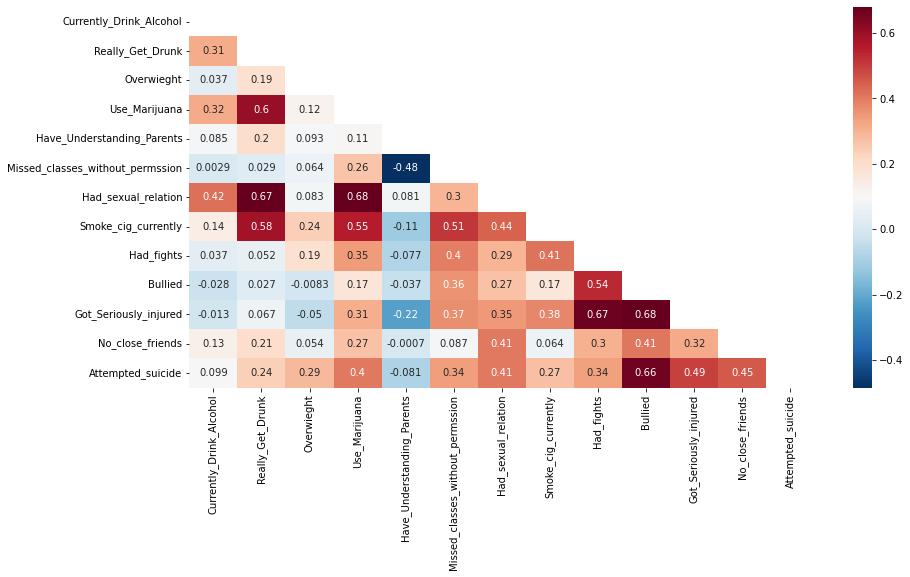

In [11]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrSuicidio)
sns.heatmap(CorrSuicidio, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

Correlaciones Fuertes
* Tener relaciones sexuales y Emborracharse
* Tener relaciones sexuales y Usar Mariguana
* Tener heridas serias y Tener Peleas
* Tener heridas serias y sufrir acoso
* Intentos de suicidios previos y sufrir acoso

#### **Paso 2:** Se hace una estandarización de los datos

In [12]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler  
Estandarizar = StandardScaler()                                                                     # Se instancia el objeto StandardScaler o MinMaxScaler 
NuevaMatriz = Suicidio.drop(columns=['Country','Age Group','Sex','Year']).dropna()                  # Se quitan las variables nominales
MEstandarizada = Estandarizar.fit_transform(NuevaMatriz)                                            # Se calculan la media y desviación para cada variable, y se escalan los datos

In [13]:
pd.DataFrame(MEstandarizada, columns=NuevaMatriz.columns)

,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,0.338487,0.593750,0.793694,0.395384,1.173445,0.161038,1.041294,0.156826,0.744876,0.770342,-1.286841,-0.387708,-0.166297
1,0.364184,0.443975,-0.089511,-0.084082,1.493255,-0.081405,0.284075,0.482385,-0.515982,-0.415124,-1.326863,-0.792039,0.468020
2,0.131074,-0.090935,-0.659522,-0.750657,0.265875,-1.069828,0.349149,-0.950073,-0.037502,1.142116,0.287350,0.668044,-0.007718
3,0.211837,-0.269238,-0.308746,-0.820823,0.611616,-2.216771,-0.692027,-1.303536,-0.347867,1.429714,-0.246274,1.431780,-0.515170
4,0.287093,0.643675,-1.248326,-0.598631,0.058430,-1.209699,0.579864,-0.782642,-0.250878,0.854518,0.460778,0.420953,-0.113437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,-0.459961,-1.132226,-0.603148,-0.622020,-1.073871,1.335956,-1.035142,-0.661721,0.589693,2.481903,0.887677,1.454243,0.531451
96,0.024614,1.064470,2.334606,-0.376440,0.317736,0.226311,0.360980,0.966071,1.035843,-0.064394,0.474118,-0.836965,0.023998
97,-0.118556,0.465371,2.491202,-0.610326,0.317736,-1.312271,-0.727522,1.356742,-0.632369,-0.015292,-0.159560,-1.016667,0.256581
98,0.320132,2.362518,2.165481,0.336913,0.335023,0.804445,1.763018,2.296210,1.094036,-0.527357,0.694238,-0.118154,-0.578602


#### **Pasos 3 y 4:** Se calcula la matriz de covarianzas o correlaciones, y se calculan los componentes (eigen-vectores) y la varianza (eigen-valores)

In [14]:
pca = PCA(n_components=None)     
pca.fit(MEstandarizada)          
print(pca.components_)

[[ 1.30994001e-01  2.82153756e-01  1.06450762e-01  3.39410728e-01
  -5.51073974e-02  2.64696585e-01  3.60731276e-01  3.13766754e-01
   3.16355977e-01  2.92231718e-01  3.34359781e-01  2.48998103e-01
   3.40211237e-01]
 [ 3.67307611e-01  4.58836720e-01  8.89788445e-02  2.71897388e-01
   3.25082059e-01 -2.58207603e-01  2.94242511e-01  9.24626710e-02
  -2.47007512e-01 -3.59352341e-01 -3.16760542e-01  8.27059262e-03
  -1.21155220e-01]
 [ 4.00516568e-02 -1.10843637e-01 -1.07717497e-01 -6.67843506e-02
   4.67231475e-01 -4.39646984e-01  5.65270694e-02 -4.37389814e-01
   1.55174018e-02  3.40076764e-01  8.72129194e-02  4.34084167e-01
   2.28075230e-01]
 [-2.61817622e-01 -4.96528731e-02  8.35182169e-01 -4.76622882e-02
   2.91240024e-01 -6.83416722e-02 -1.94134393e-01  1.30310628e-01
   1.38346444e-01 -1.25424657e-02 -1.40660079e-01 -8.49696523e-02
   1.96780758e-01]
 [-2.31178440e-01 -2.27868722e-02 -2.89007754e-01  1.78099200e-01
   5.21135259e-01 -1.55132833e-01 -5.03057627e-02  2.81178969e-01


#### **Paso 5:** Se decide el número de componentes principales

* Se calcula el porcentaje de relevancia, es decir, entre el 75 y 90% de varianza total.
* Se identifica mediante una gráfica el grupo de componentes con mayor varianza.

In [15]:
Varianza = pca.explained_variance_ratio_
print('Proporción de varianza:', Varianza)
print('Varianza acumulada:', sum(Varianza[0:7]))   
#4 - 70
#5 - 77
#6 - 83
#7 - 87
#8 - 91
# Usaremos 7 componentes ya que se tiene el 87%

Proporción de varianza: [0.3500593  0.1593905  0.10995289 0.08550723 0.06872505 0.05743784
 0.04511767 0.03364819 0.03102975 0.02587329 0.01543708 0.01155555
 0.00626566]
Varianza acumulada: 0.8761904741976413


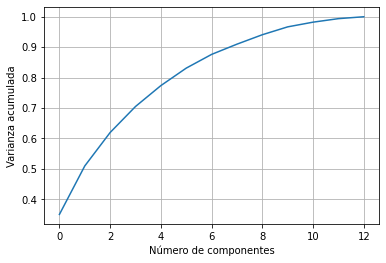

In [16]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Número de componentes')
plt.ylabel('Varianza acumulada')
plt.grid()
plt.show()

#### **Paso 6:** Se examina la proporción de relevancias –cargas–

La importancia de cada variable se refleja en la magnitud de los valores en los componentes (mayor magnitud es sinónimo de mayor importancia).

Se revisan los valores absolutos de los componentes principales seleccionados. Cuanto mayor sea el valor absoluto, más importante es esa variable en el componente principal.

In [17]:
print(pd.DataFrame(abs(pca.components_)))

          0         1         2         3         4         5         6   \
0   0.130994  0.282154  0.106451  0.339411  0.055107  0.264697  0.360731   
1   0.367308  0.458837  0.088979  0.271897  0.325082  0.258208  0.294243   
2   0.040052  0.110844  0.107717  0.066784  0.467231  0.439647  0.056527   
3   0.261818  0.049653  0.835182  0.047662  0.291240  0.068342  0.194134   
4   0.231178  0.022787  0.289008  0.178099  0.521135  0.155133  0.050306   
5   0.808721  0.316475  0.183738  0.095724  0.003690  0.007027  0.091398   
6   0.139191  0.065199  0.107237  0.007137  0.189062  0.137137  0.031892   
7   0.046344  0.004429  0.106135  0.306040  0.420688  0.635196  0.052109   
8   0.059344  0.342448  0.097074  0.730597  0.068135  0.254145  0.149208   
9   0.199055  0.056388  0.174822  0.101378  0.017825  0.152917  0.633473   
10  0.044045  0.371433  0.120177  0.006911  0.278756  0.255580  0.128880   
11  0.016401  0.069853  0.277742  0.351278  0.089455  0.037432  0.118328   
12  0.058512

In [18]:
CargasComponentes = pd.DataFrame(pca.components_, columns=NuevaMatriz.columns)
CargasComponentes

,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,0.130994,0.282154,0.106451,0.339411,-0.055107,0.264697,0.360731,0.313767,0.316356,0.292232,0.334360,0.248998,0.340211
1,0.367308,0.458837,0.088979,0.271897,0.325082,-0.258208,0.294243,0.092463,-0.247008,-0.359352,-0.316761,0.008271,-0.121155
2,0.040052,-0.110844,-0.107717,-0.066784,0.467231,-0.439647,0.056527,-0.437390,0.015517,0.340077,0.087213,0.434084,0.228075
3,-0.261818,-0.049653,0.835182,-0.047662,0.291240,-0.068342,-0.194134,0.130311,0.138346,-0.012542,-0.140660,-0.084970,0.196781
4,-0.231178,-0.022787,-0.289008,0.178099,0.521135,-0.155133,-0.050306,0.281179,0.364737,0.032749,0.263031,-0.373901,-0.332355
5,0.808721,-0.316475,0.183738,-0.095724,0.003690,-0.007027,-0.091398,-0.084566,0.356123,0.026673,0.082591,-0.194737,-0.122651
6,-0.139191,-0.065199,0.107237,0.007137,-0.189062,-0.137137,0.031892,0.031788,0.425442,-0.350096,-0.002547,0.621509,-0.467330
7,-0.046344,-0.004429,0.106135,0.306040,-0.420688,-0.635196,-0.052109,-0.078299,-0.049545,-0.190835,0.422758,-0.221015,0.192780
8,-0.059344,-0.342448,-0.097074,0.730597,0.068135,0.254145,-0.149208,-0.300244,0.114781,-0.179153,-0.280901,0.008815,0.173543
9,-0.199055,0.056388,0.174822,-0.101378,-0.017825,0.152917,0.633473,-0.572373,0.180103,-0.073679,0.080965,-0.314500,-0.142922


In [19]:
CargasComponentes = pd.DataFrame(abs(pca.components_), columns=NuevaMatriz.columns)
CargasComponentes

,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,0.130994,0.282154,0.106451,0.339411,0.055107,0.264697,0.360731,0.313767,0.316356,0.292232,0.334360,0.248998,0.340211
1,0.367308,0.458837,0.088979,0.271897,0.325082,0.258208,0.294243,0.092463,0.247008,0.359352,0.316761,0.008271,0.121155
2,0.040052,0.110844,0.107717,0.066784,0.467231,0.439647,0.056527,0.437390,0.015517,0.340077,0.087213,0.434084,0.228075
3,0.261818,0.049653,0.835182,0.047662,0.291240,0.068342,0.194134,0.130311,0.138346,0.012542,0.140660,0.084970,0.196781
4,0.231178,0.022787,0.289008,0.178099,0.521135,0.155133,0.050306,0.281179,0.364737,0.032749,0.263031,0.373901,0.332355
5,0.808721,0.316475,0.183738,0.095724,0.003690,0.007027,0.091398,0.084566,0.356123,0.026673,0.082591,0.194737,0.122651
6,0.139191,0.065199,0.107237,0.007137,0.189062,0.137137,0.031892,0.031788,0.425442,0.350096,0.002547,0.621509,0.467330
7,0.046344,0.004429,0.106135,0.306040,0.420688,0.635196,0.052109,0.078299,0.049545,0.190835,0.422758,0.221015,0.192780
8,0.059344,0.342448,0.097074,0.730597,0.068135,0.254145,0.149208,0.300244,0.114781,0.179153,0.280901,0.008815,0.173543
9,0.199055,0.056388,0.174822,0.101378,0.017825,0.152917,0.633473,0.572373,0.180103,0.073679,0.080965,0.314500,0.142922


Componentes Fuertes 50% 0-6
- Overwieght (3)
- Have_undestanding_parents (4)
- Currently_Drink_Alcohol (5)
- No_close_friends (6)

In [20]:
DatosSuicidioACP = Suicidio.drop(columns=['Country','Year','Age Group','Sex','Really_Get_Drunk','Use_Marijuana','Missed_classes_without_permssion','Had_sexual_relation','Smoke_cig_currently','Had_fights','Bullied','Got_Seriously_injured','Attempted_suicide'])
DatosSuicidioACP

,Currently_Drink_Alcohol,Overwieght,Have_Understanding_Parents,No_close_friends
0,50.3,27.8,41.5,4.8
1,44.9,39.1,44.5,5.5
2,67.2,22.5,37.1,6.3
3,68.1,27.9,39.8,6.6
4,49.3,35.9,46.2,6.1
...,...,...,...,...
101,5.8,13.6,20.2,14.3
102,32.2,60.5,36.3,4.1
103,24.4,63.0,36.3,3.3
104,48.3,57.8,36.5,7.3


## **II. Análisis correlacional de datos (ACD)**

 **Evaluación visual**

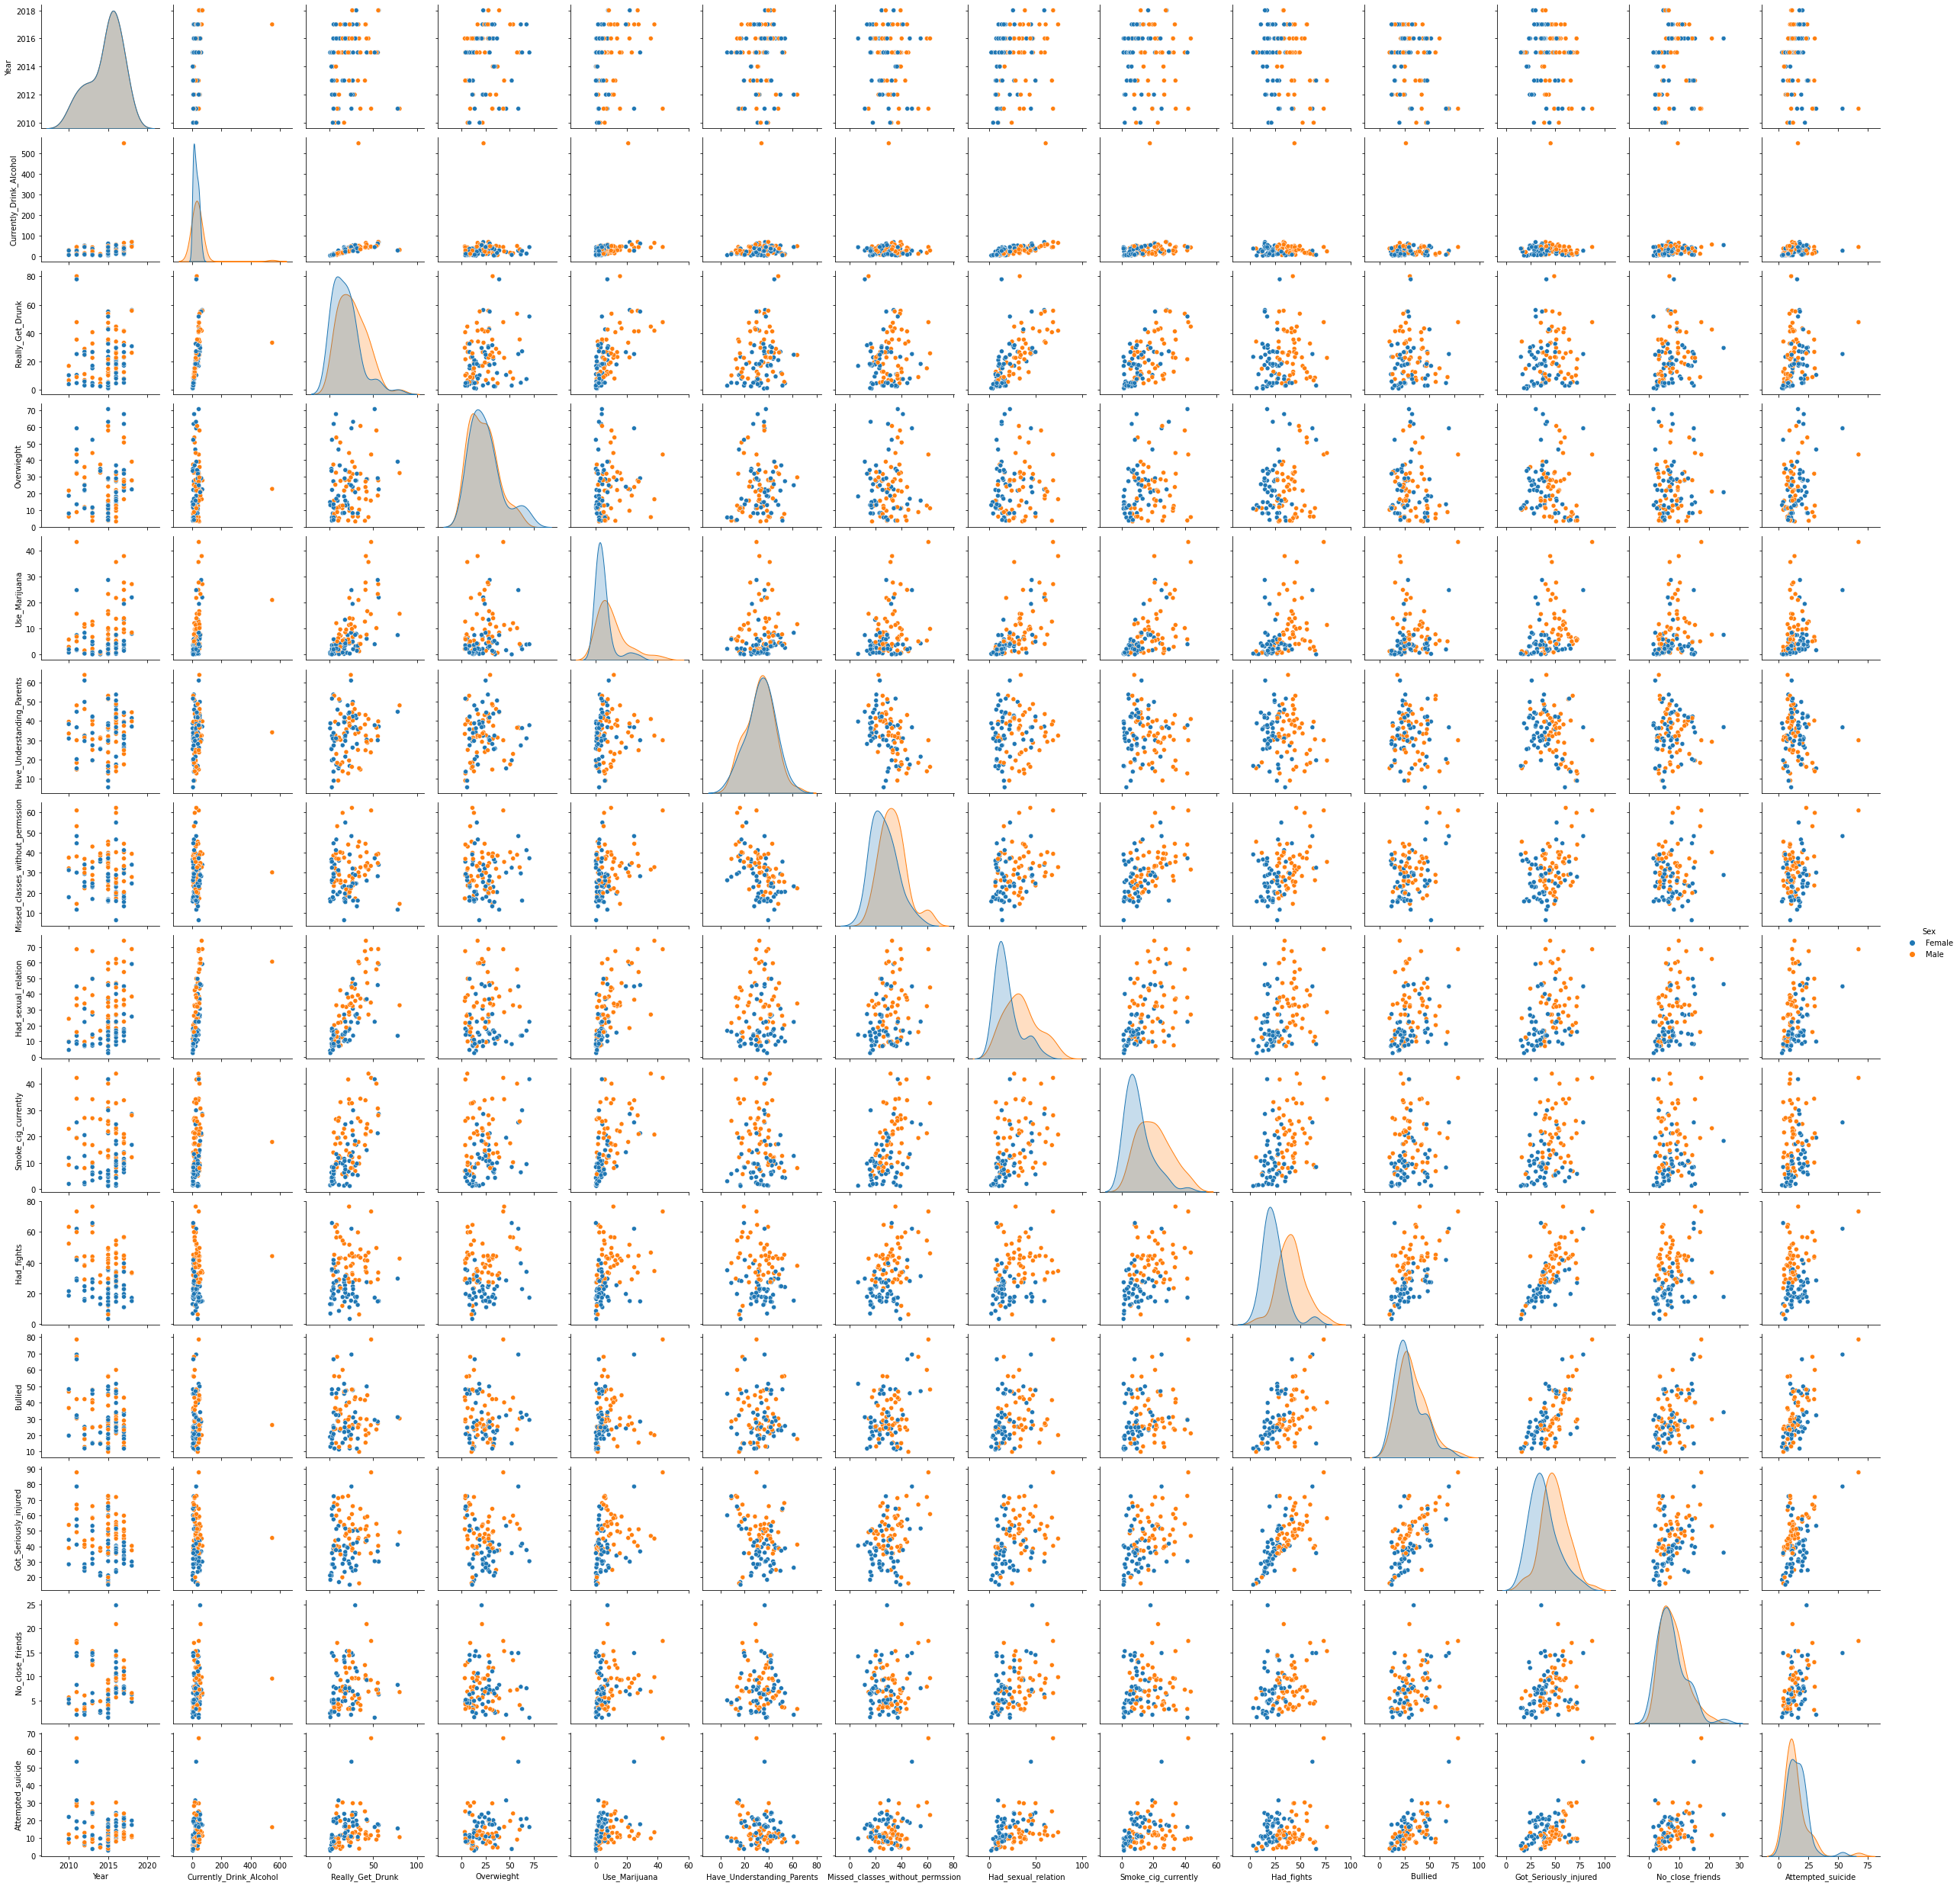

In [21]:
SuicidioRec = Suicidio.drop(columns=['Year'])
sns.pairplot(Suicidio, hue='Sex')
plt.show()

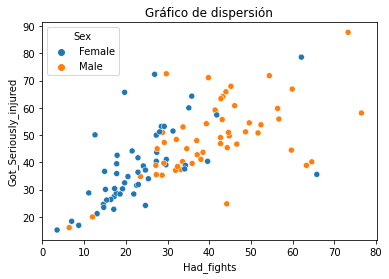

In [22]:
sns.scatterplot(x='Had_fights', y ='Got_Seriously_injured', data=Suicidio, hue='Sex')
plt.title('Gráfico de dispersión')
plt.xlabel('Had_fights')
plt.ylabel('Got_Seriously_injured')
plt.show()

In [23]:
CorrSuicidio = SuicidioRec.corr(method='pearson')
CorrSuicidio

,Currently_Drink_Alcohol,Really_Get_Drunk,Overwieght,Use_Marijuana,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Had_fights,Bullied,Got_Seriously_injured,No_close_friends,Attempted_suicide
Currently_Drink_Alcohol,1.000000,0.311971,0.037212,0.318670,0.085079,0.002931,0.418399,0.141118,0.036944,-0.028085,-0.012972,0.131297,0.098731
Really_Get_Drunk,0.311971,1.000000,0.191082,0.604226,0.199064,0.029132,0.674573,0.584109,0.052409,0.026526,0.066561,0.206292,0.235646
Overwieght,0.037212,0.191082,1.000000,0.121040,0.092736,0.063789,0.083223,0.241447,0.189777,-0.008283,-0.050310,0.053527,0.288114
Use_Marijuana,0.318670,0.604226,0.121040,1.000000,0.105225,0.261242,0.675593,0.554177,0.346987,0.171492,0.310927,0.266877,0.403062
Have_Understanding_Parents,0.085079,0.199064,0.092736,0.105225,1.000000,-0.483356,0.080762,-0.114372,-0.077071,-0.037443,-0.221525,-0.000703,-0.081001
Missed_classes_without_permssion,0.002931,0.029132,0.063789,0.261242,-0.483356,1.000000,0.296897,0.513178,0.395450,0.357598,0.368259,0.086721,0.341590
Had_sexual_relation,0.418399,0.674573,0.083223,0.675593,0.080762,0.296897,1.000000,0.441673,0.293354,0.269553,0.351281,0.405993,0.405801
Smoke_cig_currently,0.141118,0.584109,0.241447,0.554177,-0.114372,0.513178,0.441673,1.000000,0.414761,0.166785,0.379955,0.063823,0.270560
Had_fights,0.036944,0.052409,0.189777,0.346987,-0.077071,0.395450,0.293354,0.414761,1.000000,0.535614,0.666807,0.304187,0.338233
Bullied,-0.028085,0.026526,-0.008283,0.171492,-0.037443,0.357598,0.269553,0.166785,0.535614,1.000000,0.678931,0.410673,0.663481


In [24]:
print(CorrSuicidio['Had_fights'].sort_values(ascending=False)[:10], '\n')   #Top 10 valores 

Had_fights                          1.000000
Got_Seriously_injured               0.666807
Bullied                             0.535614
Smoke_cig_currently                 0.414761
Missed_classes_without_permssion    0.395450
Use_Marijuana                       0.346987
Attempted_suicide                   0.338233
No_close_friends                    0.304187
Had_sexual_relation                 0.293354
Overwieght                          0.189777
Name: Had_fights, dtype: float64 



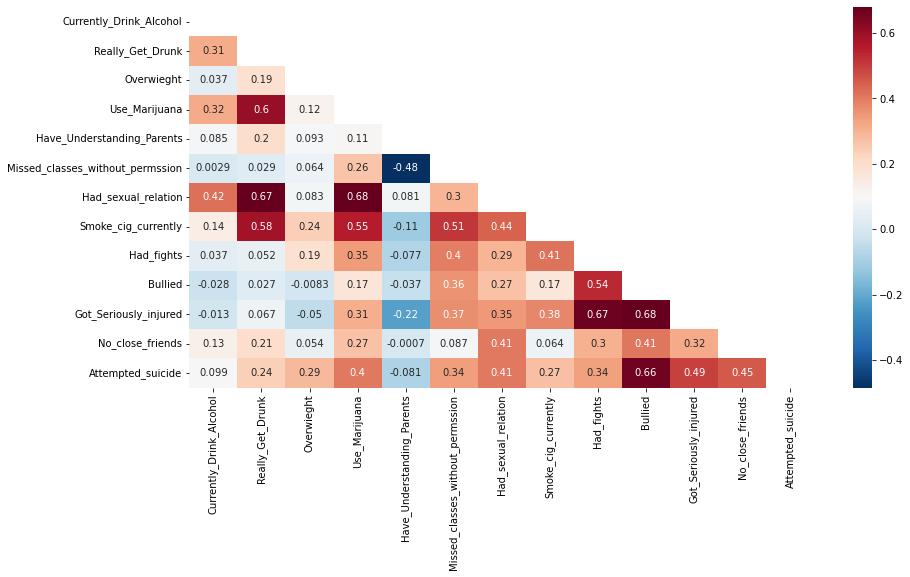

In [25]:
plt.figure(figsize=(14,7))
MatrizInf = np.triu(CorrSuicidio)
sns.heatmap(CorrSuicidio, cmap='RdBu_r', annot=True, mask=MatrizInf)
plt.show()

**Varibles seleccionadas:**

*	Currently_Drink_Alcohol
*	Overwieght
*	Have_Understanding_Parents
*	Missed_classes_without_permssion
*	Had_sexual_relation
*	Smoke_cig_currently
*	Got_Seriously_injured
*	No_close_friends
*	Attempted_suicide

In [26]:
DatosCancerACD = Suicidio.drop(columns=['Country','Year','Age Group','Sex','Really_Get_Drunk', 'Use_Marijuana', 'Had_fights', 'Bullied'])
DatosCancerACD 

,Currently_Drink_Alcohol,Overwieght,Have_Understanding_Parents,Missed_classes_without_permssion,Had_sexual_relation,Smoke_cig_currently,Got_Seriously_injured,No_close_friends,Attempted_suicide
0,50.3,27.8,41.5,24.7,25.7,16.8,27.5,4.8,19.9
1,44.9,39.1,44.5,27.9,38.4,12.1,37.4,5.5,10.4
2,67.2,22.5,37.1,34.0,59.1,28.5,30.1,6.3,17.4
3,68.1,27.9,39.8,39.4,68.6,28.0,40.3,6.6,11.2
4,49.3,35.9,46.2,32.0,43.5,17.0,24.8,6.1,12.9
...,...,...,...,...,...,...,...,...,...
101,5.8,13.6,20.2,44.6,8.4,8.2,57.4,14.3,19.5
102,32.2,60.5,36.3,32.7,32.0,25.7,51.2,4.1,14.7
103,24.4,63.0,36.3,16.2,13.6,29.9,41.7,3.3,16.9
104,48.3,57.8,36.5,38.9,55.7,40.0,54.5,7.3,9.0
